# Visualização da Informação
## Escola de Matemática Aplicada - Fundação Getúlio Vargas
## Mestrado em Modelagem Matemática

Aluno: Gianlucca Devigili<br>
Github do projeto: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from utils import *
from math import isnan

df = pd.read_csv('data/world-happiness-report.csv')
df2021 = pd.read_csv('data/world-happiness-report-2021.csv')

### Data Preparation

#### Renaming columns and 2021 data to the original dataframe

In [2]:
# rename columns to make the dfs match
df.rename(columns = {
    'Life Ladder': 'Ladder score'
}, inplace=True)

df2021.rename(columns = {
    'Healthy life expectancy': 'Healthy life expectancy at birth',
    'Logged GDP per capita': 'Log GDP per capita'
}, inplace=True)

# set year of 2021's df
df2021['year'] = 2021

# drop columns that aren't in 2021 data
df = df.drop(['Positive affect', 'Negative affect'], axis=1)

# append 2021 data to df
df = df.append(df2021[df.columns]);

# defines new names for the columns
print(df.columns)
df.columns = ['country', 'year', 'happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_of_choiche', 'generosity', 'corruption_perception']

Index(['Country name', 'year', 'Ladder score', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


#### Add highlights

In [3]:
highlight = []

# iterate over the df rows
for index, row in df.iterrows():

    # highlight the datapoint if it's the 2020's or 2021's datapoint
    if row.year in [2020, 2021]:
        highlight.append(row['year'])
    else:
        highlight.append('Other years')

df['highlight'] = highlight

df.to_pickle('data/df_happiness.pkl')

#### Adding the mean by country

In [4]:
df_mean = pd.DataFrame(columns=df.columns)

for country in df['country'].unique():
    new_col = df[df['country'] == country].groupby('country').mean()
    new_col['year'] = None
    new_col['country'] = country
    new_col['highlight'] = 'Mean score'
    df_mean = df_mean.append(new_col, ignore_index=True)

df = df.append(df_mean, ignore_index=True)

#### Adding the Regional Indicator column

In [5]:
df2021.rename(columns = {'Country name':'country'}, inplace=True)

# create a dataframe with the region for each country
df_region = {}
for country in df2021['country'].unique():
    df_region[country] = df2021[df2021['country'] == country]['Regional indicator'].values[0]

# create a new column in the dataframe with the region for each country
lst_region = []
for index, row in df.iterrows():
    try:
        lst_region.append(df_region[row['country']])
    except KeyError:
        lst_region.append(None) 

# concat the series to the dataframe
df['regional_indicator'] = lst_region

### Exploratory Data Analysis

#### Dataframe Info

In [16]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2264 non-null   object 
 1   year                   2098 non-null   object 
 2   happiness_score        2264 non-null   float64
 3   gdp_per_capita         2224 non-null   float64
 4   social_support         2250 non-null   float64
 5   life_expectancy        2208 non-null   float64
 6   freedom_of_choiche     2232 non-null   float64
 7   generosity             2171 non-null   float64
 8   corruption_perception  2152 non-null   float64
 9   highlight              2264 non-null   object 
 10  regional_indicator     2184 non-null   object 
dtypes: float64(7), object(4)
memory usage: 194.7+ KB


,country,year,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_of_choiche,generosity,corruption_perception,highlight,regional_indicator
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.to_pickle('data/df_happiness.pkl')

#### EDA Charts

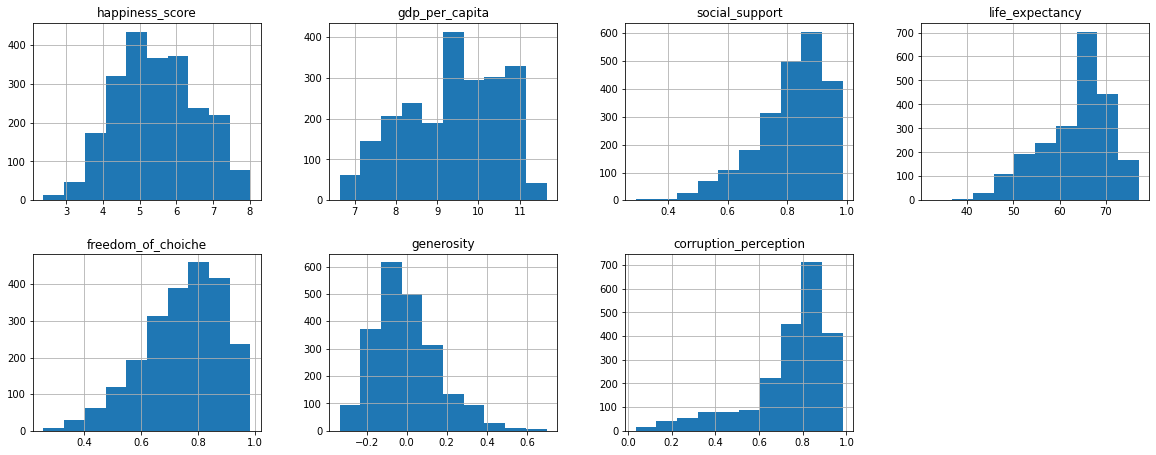

In [8]:
df.hist(figsize=(20, 7.5), layout=(2, 4));

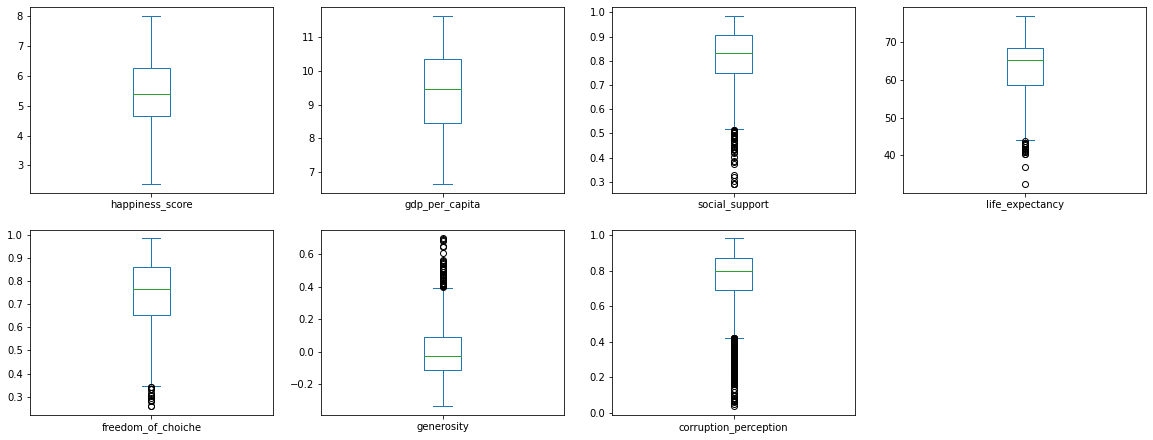

In [9]:
df.loc[:, df.columns != 'year'].plot(kind = 'box', figsize = (20, 7.5), subplots = True, layout = (2, 4));

In [10]:
px.scatter(x = df['year'], y = df['happiness_score'])

## Main Vis

### First Draft

In [11]:
fig = px.scatter(
    df, 
    x = 'happiness_score', 
    y = 'country',
    height=4000,
    hover_data = ['country', 'year', 'happiness_score']
    )

fig.update_yaxes(
    tickvals = df.country.unique()          # make a line for each country
)            

fig.update_xaxes(
    tickwidth = 1,
    range = (1, 8.2)
)

fig.show()

In [12]:
df

,country,year,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_of_choiche,generosity,corruption_perception,highlight,regional_indicator
0,Afghanistan,2008,3.724000,7.370000,0.451000,50.800000,0.718000,0.168000,0.882000,Other years,South Asia
1,Afghanistan,2009,4.402000,7.540000,0.552000,51.200000,0.679000,0.190000,0.850000,Other years,South Asia
2,Afghanistan,2010,4.758000,7.647000,0.539000,51.600000,0.600000,0.121000,0.707000,Other years,South Asia
3,Afghanistan,2011,3.832000,7.620000,0.521000,51.920000,0.496000,0.162000,0.731000,Other years,South Asia
4,Afghanistan,2012,3.783000,7.705000,0.521000,52.240000,0.531000,0.236000,0.776000,Other years,South Asia
...,...,...,...,...,...,...,...,...,...,...,...
2259,Venezuela,None,5.949375,9.448769,0.907062,66.005000,0.663188,-0.164583,0.797187,Mean score,Latin America and Caribbean
2260,Vietnam,None,5.312867,8.676467,0.830714,67.002267,0.887250,-0.004571,0.785727,Mean score,Southeast Asia
2261,Yemen,None,3.892692,8.055000,0.746923,55.040154,0.620846,-0.128091,0.822200,Mean score,Middle East and North Africa
2262,Zambia,None,4.519800,8.072067,0.735733,51.980600,0.758467,0.016533,0.828467,Mean score,Sub-Saharan Africa


### Graph with highlights

In [13]:
ascending = False

fig = px.scatter(
    df.sort_values(['happiness_score'], ascending = ascending), 
    x = 'happiness_score', 
    y = 'country',
    color = 'highlight',
    height = 200 + len(df.country.unique()) * 20,
    hover_data = ['country', 'year', 'happiness_score'],
    color_discrete_map={
            'Other years': '#E0E0E0',
            2020: '#3177CD',
            2021: '#051B33'
        },
    labels = {
        'x': 'Happiness Index Score',
        'y': None
    }
)

fig.update_yaxes(
    tickvals = df.country.unique(),              # make a line for each country
    range=[-.5,len(df.country.unique())+.5]
)            

fig.update_xaxes(
    tickwidth = 1,
    range = (2, 8.2)
)

fig.update_traces(
    marker = {
        'size': 12,
        'opacity':0.9,
        'line':{'width':1, 'color': 'DarkSlateGrey'},
    }
    
)

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)'       # make the background transparent
    # 'paper_bgcolor': 'rgba(0, 0, 0, 0)'
}
)

In [14]:
df.country.isin(['Brazil', 'Argentina'])

0       False
1       False
2       False
3       False
4       False
        ...  
2259    False
2260    False
2261    False
2262    False
2263    False
Name: country, Length: 2264, dtype: bool